<a href="https://colab.research.google.com/github/Elehci/Data-Driven-Insights./blob/main/Data_Driven_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Desenvolvido por  Michele Cristina Fonseca
# Carregando um arquivo para o notebook
from google.colab import files
# Abre um diálogo para upload
Upload = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [2]:
# Importando todas bibliotecas que irei utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Pandas
# Abrindo arquivo carregado
# Leitura do csv
# Exibir as cinco primeiras linhas
# Quantidade de linhas e colunas
df = pd.read_csv('sales_data_sample.csv',encoding='latin-1')
print('Dados de Sales')
print(df.head(5))

Dados de Sales
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbay

In [ ]:
# Ver tipos de dados de cada coluna
print("Tipos das colunas:\n", df.dtypes)
print(df.head())

Tipos das colunas:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74        

In [ ]:
# Exibir os nomes das colunas
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [ ]:
# Ver dados de cada coluna
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [ ]:
# Listar as 5 primeiras linhas produto
productline_list = list(df['PRODUCTLINE'])
print('Primeiros 5 PRODUCTLINE:')
for item in productline_list[:5]:
 print(item)

Primeiros 5 PRODUCTLINE:
Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles


In [ ]:
# Visualizando o número de linhas e colunas
df.shape

(2823, 25)

In [ ]:
# Corrigindo o nome da coluna de "Sales" para "SALES"
# A condição de filtragem "== 'Número do pedido' não é apropriada para a coluna 'VENDAS' (que é numérica).
# Removerei a filtragem por enquanto e você poderá especificar a condição de filtragem correta, se necessário.
print(df["SALES"])

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64


In [ ]:
# Numpy
# Encontrando a linha de produtos com as maiores vendas em cada mês
# Primeiro, fundir o DataFrame para ter os meses como uma coluna
# Selecionar as colunas relevantes
df_melted = df.melt(
    id_vars=['PRODUCTLINE'],
    value_vars=['QUANTITYORDERED', 'PRICEEACH', 'SALES'],
    var_name='Metric',
    value_name='Value'
)

In [ ]:
# Agora, vou agrupar por Linha de Produtos e Métrica para encontrar o valor máximo
# Isso fornecera uma possível análise
print("Highest value per Product Line and Metric:")
print(df_melted.groupby(['PRODUCTLINE', 'Metric'])['Value'] .max())

Highest value per Product Line and Metric:
PRODUCTLINE       Metric         
Classic Cars      PRICEEACH            100.00
                  QUANTITYORDERED       97.00
                  SALES              12001.00
Motorcycles       PRICEEACH            100.00
                  QUANTITYORDERED       66.00
                  SALES              11886.60
Planes            PRICEEACH            100.00
                  QUANTITYORDERED       85.00
                  SALES              10066.60
Ships             PRICEEACH            100.00
                  QUANTITYORDERED       55.00
                  SALES               6960.48
Trains            PRICEEACH            100.00
                  QUANTITYORDERED       51.00
                  SALES               8977.05
Trucks and Buses  PRICEEACH            100.00
                  QUANTITYORDERED       70.00
                  SALES               8844.12
Vintage Cars      PRICEEACH            100.00
                  QUANTITYORDERED       76.00
   

In [ ]:
# Extrair uma coluna de interesse em uma lista
# Faça um loop imprimindo informações sobre cada item.
product_lines = list(df['PRODUCTLINE'].unique())
print("\nLinhas de produtos únicas:")
for product in product_lines:
    print(product)


Linhas de produtos únicas:
Motorcycles
Classic Cars
Trucks and Buses
Vintage Cars
Planes
Ships
Trains


In [ ]:

# Lista
# Lista com coluna de texto/categoria
print("Tipo das colunas:\n", df.dtypes)

Tipo das colunas:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [ ]:
# Tupla
# Criando uma tupla contendo três informações
nome_tupla = df[['PRODUCTLINE', 'PRICEEACH', 'SALES']]

In [ ]:
# Informação das primeiras 5 linhas
# Imprima como tuplas
print("\nPrimeiras 5 linhas como tuplas:")
for index, row in nome_tupla.head(5).iterrows():
    print(tuple(row))


Primeiras 5 linhas como tuplas:
('Motorcycles', 95.7, 2871.0)
('Motorcycles', 81.35, 2765.9)
('Motorcycles', 94.74, 3884.34)
('Motorcycles', 83.26, 3746.7)
('Motorcycles', 100.0, 5205.27)


In [ ]:
# Dicionário
# Criando um dicionário produto valor_médio
# Calcule a média de 'VENDAS'
product_price = df.groupby('PRODUCTLINE')['SALES'].mean().round(2)
product_price_dict = product_price.to_dict()
print("\nPreço médio por linha de produto (3 primeiros):")
for i, (product_line, average_price) in enumerate(product_price_dict.items()):
    if i < 3:
        print(f"{product_line}: {average_price}")


Preço médio por linha de produto (3 primeiros):
Classic Cars: 4053.38
Motorcycles: 3523.83
Planes: 3186.29


In [ ]:
# Tupla
# Informações de uma linha
first_row = df.iloc[0]
order_tuple = (first_row['ORDERNUMBER'], first_row['PRODUCTLINE'], first_row['SALES'])
print('Tupla da primeira linha:')
print(order_tuple)

Tupla da primeira linha:
(np.int64(10107), 'Motorcycles', np.float64(2871.0))


In [ ]:
# Estruturas Condicionais e Laços
# Escolher uma coluna numérica adequada
# Substituir os valores (10, 5) conforme a distribuição da sua coluna
coluna_numerica = 'QUANTITYORDERED'
primeiro_valor = df[coluna_numerica][0]
if primeiro_valor > 30:
    print("Valor alto")
elif primeiro_valor > 20:
    print("Valor intermediário")
else:
    print("Valor baixo")

Valor intermediário


In [ ]:
# For para operar sobre n primeiros elementos de uma coluna numérica escolhida
soma = 0
coluna_numerica = 'QUANTITYORDERED' # Define a variável aqui
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores:", soma)

Soma dos 5 primeiros valores: 199


In [ ]:
# While
# Adicionando um laço while para encontrar o primeiro valor na lista maior que 35
limite = 35
i = 0
coluna_numerica = 'QUANTITYORDERED'
lista = list(df[coluna_numerica][:5])
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Primeiro valor > 35 encontrado: 41


In [ ]:
# Operações matemáticas entre colunas
# Diferença entre SALES e PRICEEACH * QUANTITYORDERED (para verificar se há descontos ou taxas)
df['DIF_SALES_PRICE_QTY'] = df['SALES'] - (df['PRICEEACH'] * df['QUANTITYORDERED'])
print('Diferença entre SALES e (PRICEEACH * QUANTITYORDERED):')
print(df[['SALES', 'PRICEEACH', 'QUANTITYORDERED', 'DIF_SALES_PRICE_QTY']].head())

Diferença entre SALES e (PRICEEACH * QUANTITYORDERED):
     SALES  PRICEEACH  QUANTITYORDERED  DIF_SALES_PRICE_QTY
0  2871.00      95.70               30         0.000000e+00
1  2765.90      81.35               34         4.547474e-13
2  3884.34      94.74               41         4.547474e-13
3  3746.70      83.26               45        -4.547474e-13
4  5205.27     100.00               49         3.052700e+02


In [ ]:
# Criando nova coluna aplicando um cálculo simples
# Valor total do pedido com um imposto de 5%
df['SALES_COM_IMPOSTO'] = df['SALES'] * 1.05
print('Vendas com imposto de 5%:')
print(df[['SALES', 'SALES_COM_IMPOSTO']].head())

Vendas com imposto de 5%:
     SALES  SALES_COM_IMPOSTO
0  2871.00          3014.5500
1  2765.90          2904.1950
2  3884.34          4078.5570
3  3746.70          3934.0350
4  5205.27          5465.5335


In [ ]:
# Criando um array NumPy a partir de uma coluna numérica da base.
import numpy as np
array_quantity = np.array(df['QUANTITYORDERED'])
print('Array NumPy da coluna QUANTITYORDERED (primeiros 5 elementos):')
print(array_quantity[:5])

Array NumPy da coluna QUANTITYORDERED (primeiros 5 elementos):
[30 34 41 45 49]


In [ ]:
# Realizando duas operações vetorizadas com esse array
array_plus_10 = array_quantity + 10
array_squared = array_quantity ** 2
print('Array + 10 (primeiros 5 elementos):')
print(array_plus_10[:5])
print('Array ao quadrado (primeiros 5 elementos):')
print(array_squared[:5])

Array + 10 (primeiros 5 elementos):
[40 44 51 55 59]
Array ao quadrado (primeiros 5 elementos):
[ 900 1156 1681 2025 2401]


In [ ]:
# Acessar, modificar e exibir partes do array (fatiamento/slicing ou indexação).
print('Terceiro elemento do array:')
print(array_quantity[2])

Terceiro elemento do array:
41


In [ ]:
# Fazendo uma operação agregada, como soma ou média, sobre o array.
print('Soma de todos os elementos do array:')
print(array_quantity.sum())
print('Média de todos os elementos do array:')
print(array_quantity.mean())

Soma de todos os elementos do array:
99067
Média de todos os elementos do array:
35.09280906836698


In [ ]:
# Selecionar linhas/colunas específicas
# Usando .loc para selecionar linhas com STATUS 'Shipped' e colunas 'ORDERNUMBER', 'STATUS', 'SALES'
shipped_orders = df.loc[df["STATUS"] == "Shipped", ["ORDERNUMBER", "STATUS", "SALES"]]
print("Primeiras 5 ordens com STATUS 'Shipped':")
print(shipped_orders.head())

Primeiras 5 ordens com STATUS 'Shipped':
   ORDERNUMBER   STATUS    SALES
0        10107  Shipped  2871.00
1        10121  Shipped  2765.90
2        10134  Shipped  3884.34
3        10145  Shipped  3746.70
4        10159  Shipped  5205.27


In [ ]:
# Usando .iloc para selecionar as 5 primeiras linhas e as colunas 0, 1, 4 (ORDERNUMBER, QUANTITYORDERED, SALES)
selected_iloc = df.iloc[:5, [0, 1, 4]]
print("Primeiras 5 linhas e colunas 0, 1, 4 (iloc):")
print(selected_iloc)

Primeiras 5 linhas e colunas 0, 1, 4 (iloc):
   ORDERNUMBER  QUANTITYORDERED    SALES
0        10107               30  2871.00
1        10121               34  2765.90
2        10134               41  3884.34
3        10145               45  3746.70
4        10159               49  5205.27


In [ ]:
# Contar agrupar informações simples
# Contagem de valores únicos na coluna 'PRODUCTLINE'
productline_counts = df["PRODUCTLINE"].value_counts()
print("Contagem de produtos por linha:")
print(productline_counts)

Contagem de produtos por linha:
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64


In [ ]:
# Análise agregada: Vendas totais por 'PRODUCTLINE'
sales_by_productline = df.groupby("PRODUCTLINE")["SALES"].sum()
print("Vendas totais por linha de produto:")
print(sales_by_productline)

Vendas totais por linha de produto:
PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


In [ ]:
# Converter ORDERDATE para datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

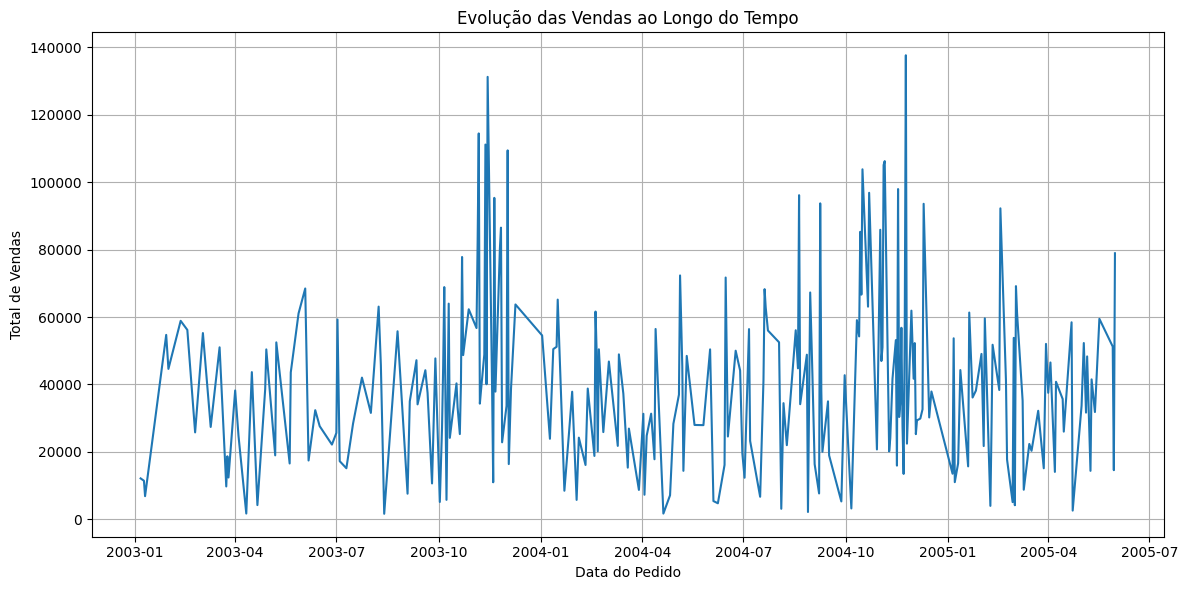

In [ ]:
# Gráfico de Linha: Vendas ao longo do tempo
# Agrupar por data e somar as vendas
import matplotlib.pyplot as plt
sales_over_time = df.groupby(df["ORDERDATE"].dt.date)["SALES"].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind="line")
plt.title("Evolução das Vendas ao Longo do Tempo")
plt.xlabel("Data do Pedido")
plt.ylabel("Total de Vendas")
plt.grid(True)
plt.tight_layout()

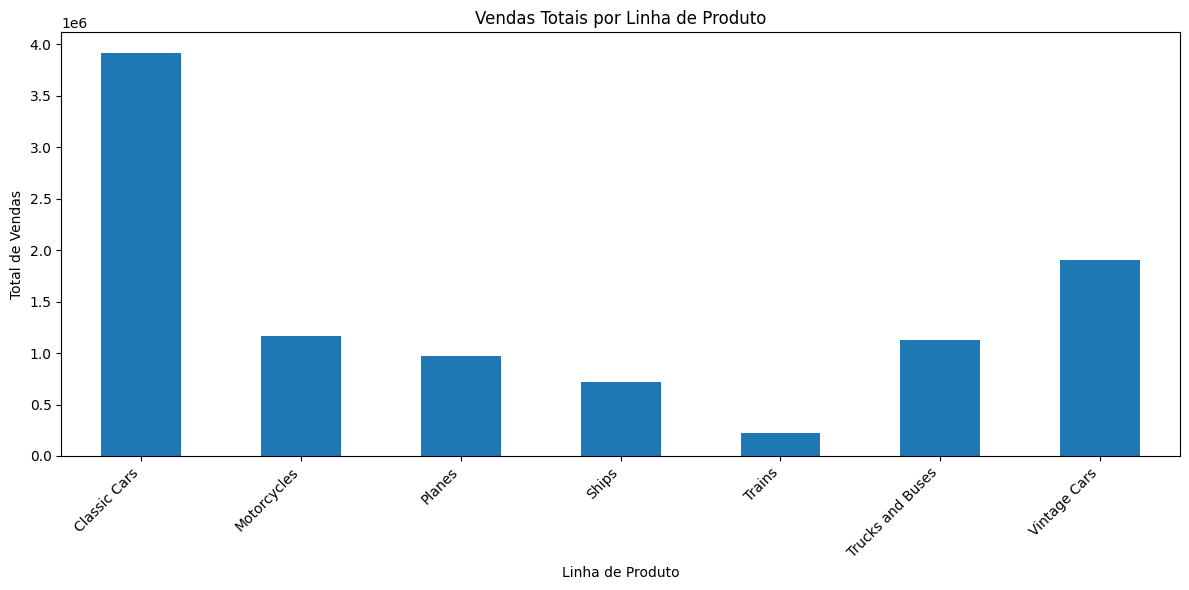

In [ ]:
# Dados: vendas totais por linha
# Criando um gráfico de Barras: Vendas totais por linha de
import matplotlib.pyplot as plt
produtosales_by_productline = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_productline.plot(kind="bar")
plt.title("Vendas Totais por Linha de Produto")
plt.xlabel("Linha de Produto")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

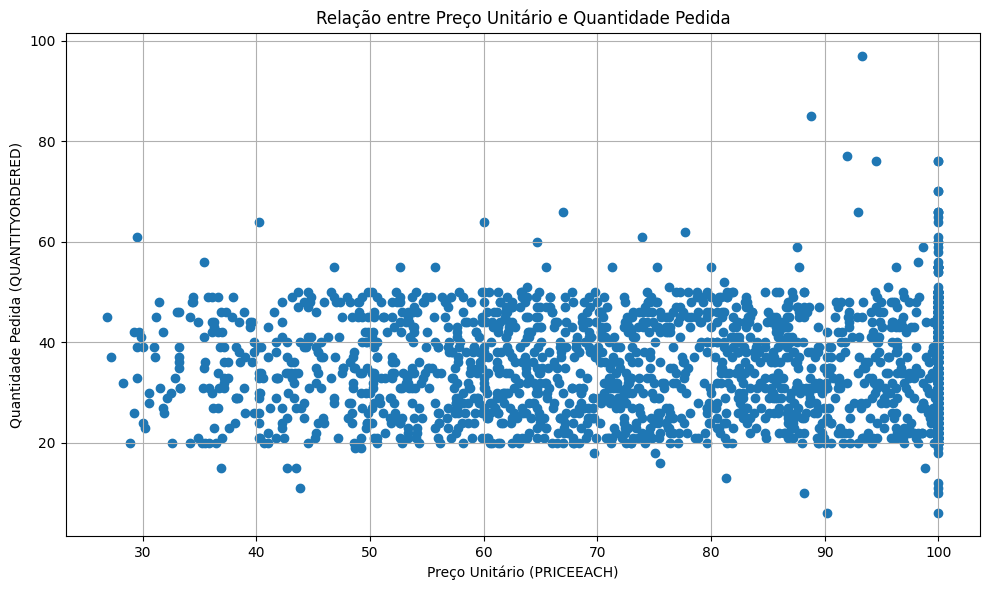

In [ ]:
# Gráficos de Dispersão: Relação entre Preço Unitário e Quantidade Pedida
plt.figure(figsize=(10, 6))
plt.scatter(df["PRICEEACH"], df["QUANTITYORDERED"])
plt.title("Relação entre Preço Unitário e Quantidade Pedida")
plt.xlabel("Preço Unitário (PRICEEACH)")
plt.ylabel("Quantidade Pedida (QUANTITYORDERED)")
plt.grid(True)
plt.tight_layout()